# Experiment 7

#### Problem Statement:
Implement a Python Code for the following problem:
A logistics company is trying to optimize their delivery routes. They have a dataset of historical delivery data, which includes the start and end points of each delivery, as well as the distance between each point. They want to use graph-based visualization and logical reasoning to identify the most efficient delivery routes.

| Delivery ID | Start Point | End Point | Distance (in miles) |
|-------------|-------------|-----------|----------------------|
| 1           | Warehouse   | Point A   | 10                   |
| 2           | Point A     | Point B   | 5                    |
| 3           | Point A     | Point C   | 8                    |
| 4           | Point B     | Point C   | 7                    |
| 5           | Point B     | Point D   | 12                   |
| 6           | Point C     | Point D   | 6                    |
| 7           | Point C     | Point E   | 9                    |
| 8           | Point D     | Point E   | 11                   |


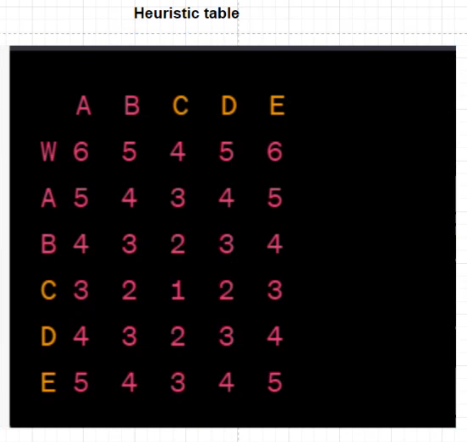


#### Pseudocode
```
Initialize empty priority queue pq with (0, start, empty list, 0)
Initialize empty set visited

While pq is not empty:
    Pop (priority, current, path, cost) from pq
    If current is visited:
        Continue
    Add current to visited
    Update path by appending current

    If current equals end:
        Return path and cost
    
    For each neighbor of current:
        If current or end not in heuristic_table:
            Continue
        Get weight from graph for edge (current, neighbor)
        Get heuristic from heuristic_table for (current, end)
        Calculate new_cost = cost + weight
        Calculate new_priority = new_cost + heuristic

        Add (new_priority, neighbor, path, new_cost) to pq

If function reaches this point:
    Return None, None

```

#### Code:

In [12]:
# To plot a networkx graph in pyvis
import numpy as np
import pandas as pd
import networkx as nx
from pyvis.network import Network
import heapq

##### Graph Building using Networkx


In [13]:
# Step 1: Create a graph representation of delivery routes
def create_delivery_graph(data):
    # TODO: Implement this function to create a graph from the given delivery data using NetworkX
    G = nx.DiGraph()
    for _, start, end, distance in data:
        G.add_edge(start, end, weight=distance)
        G.add_edge(end, start, weight=distance)  
    return G

##### Graph Visualize using Pyvis


In [14]:
# Step 2: Visualize the graph using Pyvis
def visualize_graph(graph):
    # TODO: Implement this function to visualize the graph using Pyvis
    # Create an empty PyVis Network object
    net = Network(notebook=True)

    # Add nodes and edges to the PyVis graph
    for node in graph.nodes():
        net.add_node(node, label=node)
    for edge in graph.edges():
        weight = graph[edge[0]][edge[1]]['weight']
        net.add_edge(edge[0], edge[1], title=str(weight), label=str(weight))

    # Save the graph as an HTML file
    net.show("delivery_routes_graph.html")

##### A\* Search Algorithm


In [15]:
# Step 3: Implement A* heuristic search algorithm


def a_star_search(graph, start, end, heuristic_table):
    pq = [(0, start, [start], 0)]
    visited = set()

    while pq:
        priority, current, path, cost = heapq.heappop(pq)

        if current in visited:
            continue
        visited.add(current)

        if current == end:
            return path, cost

        for neighbor in graph.neighbors(current):
            if neighbor in visited:
                continue

            weight = graph[current][neighbor]['weight']
            heuristic = 0
            if neighbor in heuristic_table.index:
                heuristic = heuristic_table.loc[neighbor, end]

            new_cost = cost + weight
            new_priority = new_cost + heuristic

            heapq.heappush(pq, (new_priority, neighbor,
                           path + [neighbor], new_cost))

    return None, None

##### Main function to solve the problem


In [16]:
if __name__ == "__main__":
    # Sample dataset
    delivery_data = [
        (1, 'Warehouse', 'Point A', 10),
        (2, 'Point A', 'Point B', 5),
        (3, 'Point A', 'Point C', 8),
        (4, 'Point B', 'Point C', 7),
        (5, 'Point B', 'Point D', 12),
        (6, 'Point C', 'Point D', 6),
        (7, 'Point C', 'Point E', 9),
        (8, 'Point D', 'Point E', 11)
    ]

    # making delivery_data into a pandas dataframe
    delivery_data_df = pd.DataFrame(delivery_data, columns=[
        'id', 'start', 'end', 'distance'])

    # printing the dataframe
    print(delivery_data_df.to_markdown(), end="\n\n")

    # Create the heuristic table
    heuristic_table = pd.DataFrame({
        'Warehouse': [6, 5, 4, 5, 6],
        'Point A': [5, 4, 3, 4, 5],
        'Point B': [4, 3, 2, 3, 4],
        'Point C': [3, 2, 1, 2, 3],
        'Point D': [4, 3, 2, 3, 4],
        'Point E': [5, 4, 3, 4, 5]
    }, index=['Point A', 'Point B', 'Point C', 'Point D', 'Point E'])

    print(heuristic_table.to_markdown(), end="\n\n")

    # Create the delivery graph
    delivery_graph = create_delivery_graph(delivery_data)

    # Visualize the graph
    visualize_graph(delivery_graph)

    # Find the shortest distance using A* heuristic search
    start_point = 'Warehouse'
    end_point = 'Point E'
    shortest_path, shortest_distance = a_star_search(
        delivery_graph, start_point, end_point, heuristic_table)

    if shortest_path:
        print(
            f"Shortest path from {start_point} to {end_point}: {' -> '.join(shortest_path)}")
        print(f"Shortest distance: {shortest_distance} miles")
    else:
        print(f"No path found from {start_point} to {end_point}")

|    |   id | start     | end     |   distance |
|---:|-----:|:----------|:--------|-----------:|
|  0 |    1 | Warehouse | Point A |         10 |
|  1 |    2 | Point A   | Point B |          5 |
|  2 |    3 | Point A   | Point C |          8 |
|  3 |    4 | Point B   | Point C |          7 |
|  4 |    5 | Point B   | Point D |         12 |
|  5 |    6 | Point C   | Point D |          6 |
|  6 |    7 | Point C   | Point E |          9 |
|  7 |    8 | Point D   | Point E |         11 |

|         |   Warehouse |   Point A |   Point B |   Point C |   Point D |   Point E |
|:--------|------------:|----------:|----------:|----------:|----------:|----------:|
| Point A |           6 |         5 |         4 |         3 |         4 |         5 |
| Point B |           5 |         4 |         3 |         2 |         3 |         4 |
| Point C |           4 |         3 |         2 |         1 |         2 |         3 |
| Point D |           5 |         4 |         3 |         2 |         3 |      